In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.shape

(150, 6)

In [10]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
counts = df.Species.value_counts()
counts

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

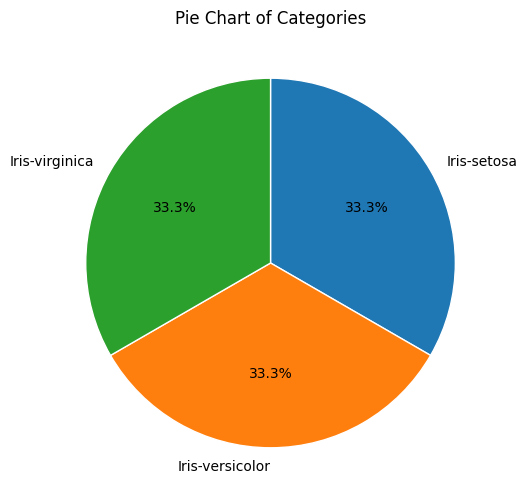

In [22]:
plt.figure(figsize=(8,6))
plt.pie(
    counts.values,                
    labels=counts.index,          
    autopct='%1.1f%%',            
    startangle=90,                
    counterclock=False,         
    wedgeprops={'edgecolor':'w'}  
)
plt.title("Pie Chart of Categories")
plt.show()

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


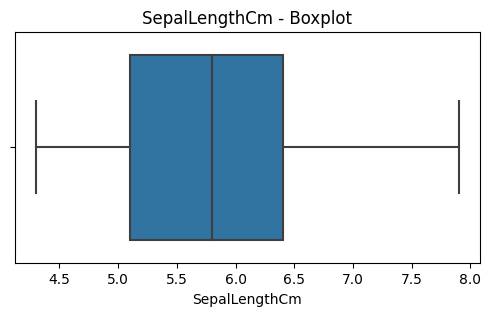

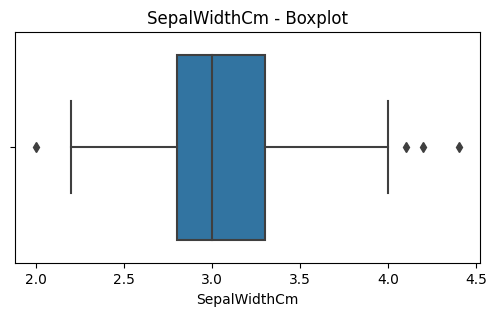

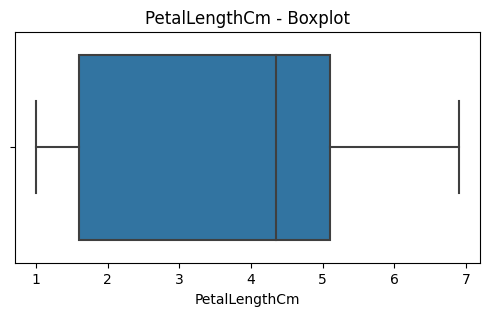

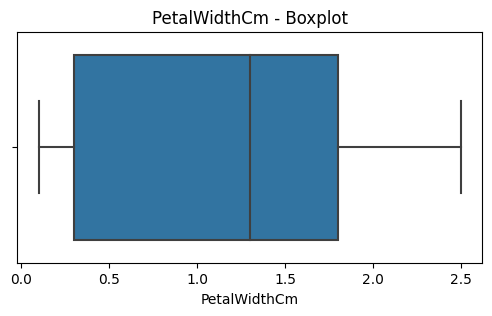

In [15]:
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.show()

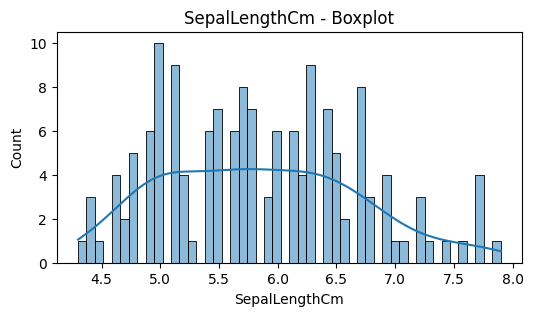

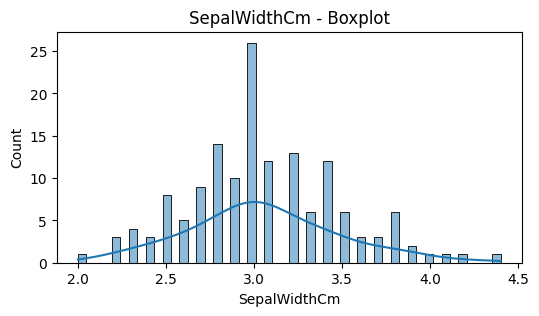

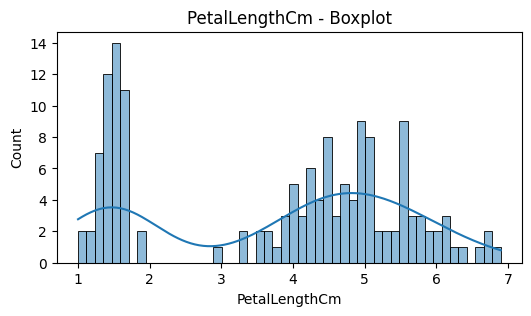

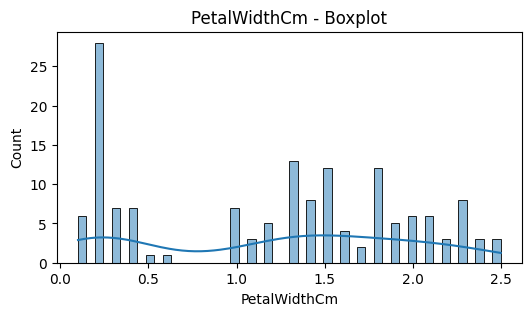

In [18]:
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(x=df[col],bins= 50,kde =True)
    plt.title(f"{col} - Boxplot")
    plt.show()

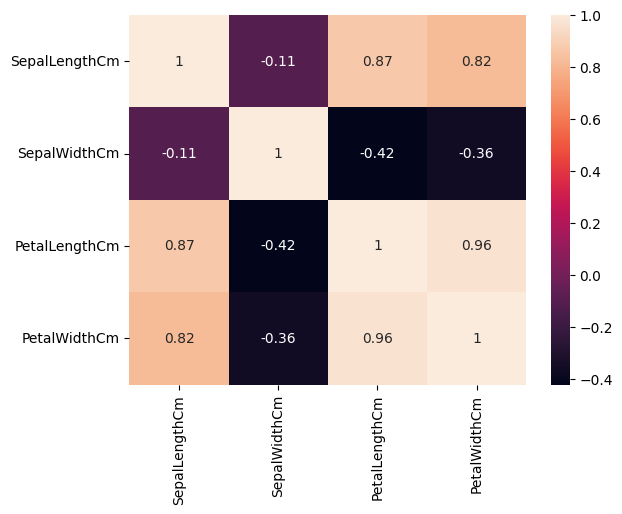

In [21]:
correlations= df.drop('Id',axis=1).corr(numeric_only=True)
sns.heatmap(correlations,annot=True)
plt.show()

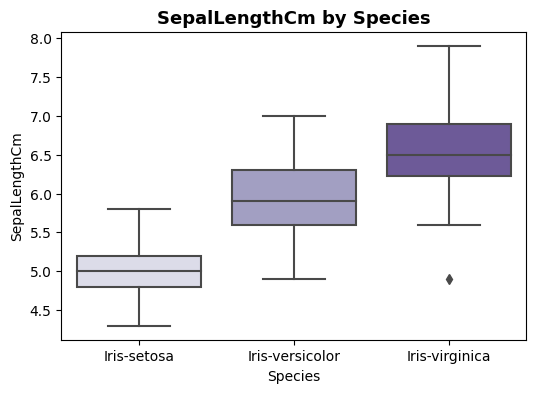

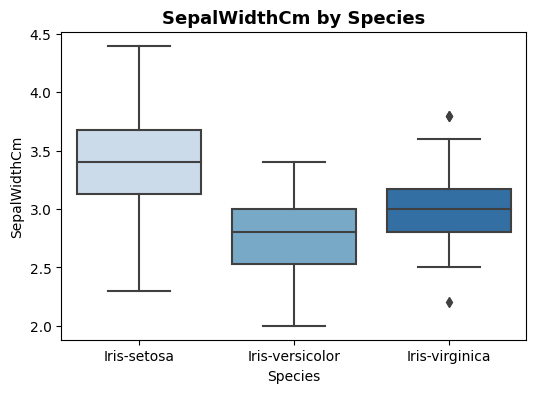

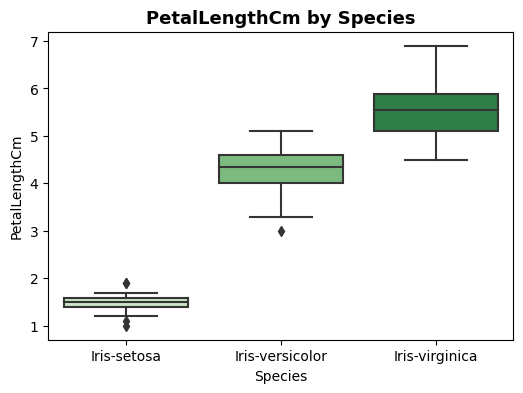

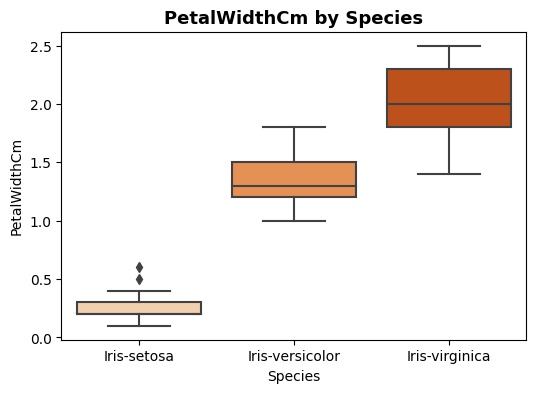

In [25]:
palettes = ['Purples', 'Blues', 'Greens', 'Oranges']
for col, pal in zip(num_cols, palettes):
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Species', y=col, data=df, palette=pal)
    plt.title(f"{col} by Species", fontsize=13, fontweight='bold')
    plt.show()

In [36]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
# Map species names to numbers
df['Species'] = df['Species'].map({'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2})
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [38]:
df['Species'].unique()

array([0, 1, 2])

In [39]:
# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [90]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [120]:
#  Logistic Regression
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.86      0.95      0.90        20
           2       0.94      0.85      0.89        20

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



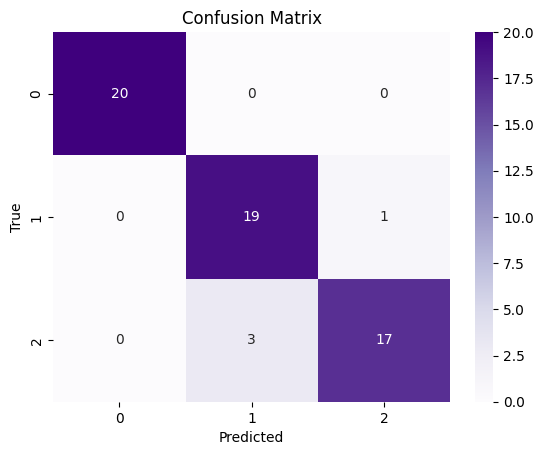

In [121]:
labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels)


sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [122]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)  
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average CV score: 0.9733333333333334


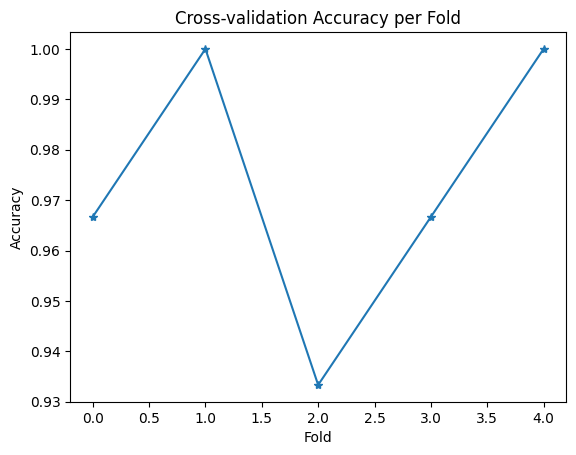

In [101]:
plt.plot(scores, marker='*')
plt.title("Cross-validation Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()


In [105]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.83      0.95      0.88        20
           2       0.94      0.80      0.86        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



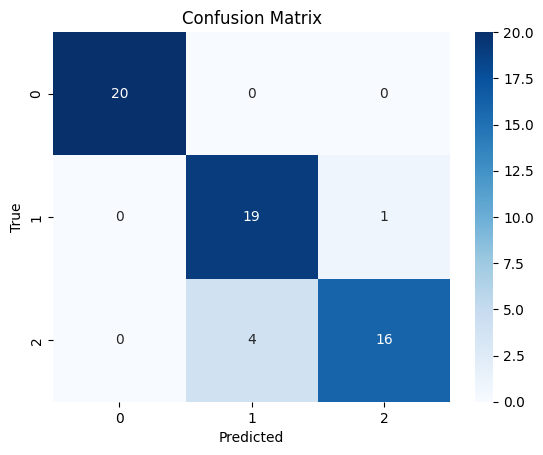

In [106]:
labels = [0, 1, 2]  

cm = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [115]:
scores = cross_val_score(knn, X, y, cv=5)  
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average CV score: 0.9733333333333334


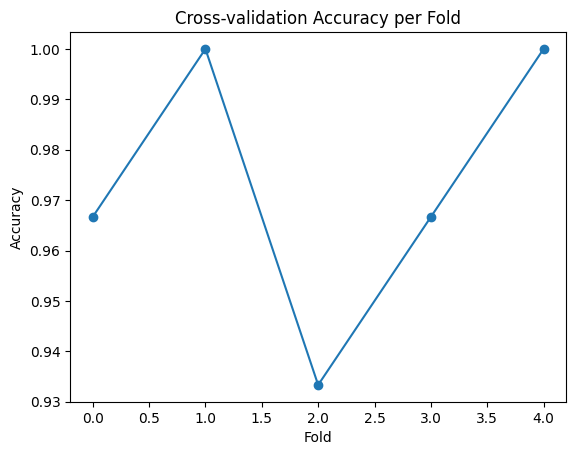

In [116]:
plt.plot(scores, marker='o')
plt.title("Cross-validation Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()
